In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import cycler
import matplotlib as mpl
from wandb import Api

In [2]:
plt.style.use(["tableau-colorblind10", "seaborn-talk"])

In [3]:
dense_exp_runs = [
    "zc-emu-not-dense-v1-offline",
    "zc-emu-gsc-prior-precpd-simple-v2-offline",
    "zc-emu-using-dense-v1-offline",
    "zc-emu-not-dense-v1-online",
    "zc-emu-gsc-prior-precpd-simple-v2-online",
    "zc-emu-using-dense-v1-online",
]

rh_runs = [
    "zcemu-monthly-init-rh-in-m01-30d-v1-online",
    "zcemu-monthly-init-rh-in-m02-30d-v1-online",
    "zcemu-monthly-init-rh-in-m03-30d-v1-online",
    "zcemu-monthly-init-rh-in-m04-30d-v1-online",
    "zcemu-monthly-init-rh-in-m05-30d-v1-online",
    "zcemu-monthly-init-rh-in-m06-30d-v2-online",
    "zcemu-monthly-init-rh-in-m07-30d-v1-online",
    "zcemu-monthly-init-rh-in-m08-30d-v1-online",
    "zcemu-monthly-init-rh-in-m09-30d-v1-online",
    "zcemu-monthly-init-rh-in-m10-30d-v1-online",
    "zcemu-monthly-init-rh-in-m11-30d-v1-online",
    "zcemu-monthly-init-rh-in-m12-30d-v1-online",
]

precip_runs = [
    "zc-emu-precip-strict-conserve-v1-online",
    "zc-emu-precip-simple-conserve-v1-online",
    "zc-emu-precip-no-conserve-v1-online"
]

seeded_runs = [
    "zc-emu-seed1-prognostic-30d-v2-online",
    "zc-emu-seed2-prognostic-30d-v2-online",
    "zc-emu-seed3-prognostic-30d-v2-online",
    "zc-emu-seed4-prognostic-30d-v2-online",
    "zc-emu-seed5-prognostic-30d-v2-online",
    "zc-emu-seed1-prognostic-30d-v2-offline",
    "zc-emu-seed2-prognostic-30d-v2-offline",
    "zc-emu-seed3-prognostic-30d-v2-offline",
    "zc-emu-seed4-prognostic-30d-v2-offline",
    "zc-emu-seed5-prognostic-30d-v2-offline",
]

phase_dep = [
    "zc-emu-temp-in-adjust-phase-dep-gscond-30d-v3-online",
    "zc-emu-temp-in-adjust-phase-dep-gscond-30d-v3-offline"
]

all_runs = dense_exp_runs + seeded_runs + rh_runs + precip_runs + phase_dep

In [4]:
api = Api()

def _get_run_summary(group):
    runs = api.runs(
        "ai2cm/microphysics-emulation",
        filters={"group": {"$regex": group}},
    )

    summary_stats = {}
    for run in runs:
        summary_stats.update(run.summary)

    return summary_stats
        


In [5]:
summary = _get_run_summary(all_runs[0])

In [6]:
skill_keys = [key for key in summary.keys() if "column_skill" in key]

In [7]:
columns = sorted(skill_keys)
columns.insert(2, columns[-2])
columns.insert(3, columns[-1])
columns = columns[:-2]

In [8]:

columns = [
    'column_skill/air_temperature',
    'column_skill/cloud_water',
    'column_skill/specific_humidity',
    'column_skill/surface_precipitation',
    'column_skill/gscond/air_temperature',
    'column_skill/gscond/cloud_water',
    'column_skill/gscond/specific_humidity',
    'column_skill/precpd/air_temperature',
    'column_skill/precpd/cloud_water',
    'column_skill/precpd/specific_humidity',
    "tropical_average_temp_near_tropopause_5d_k",
    "antarctic_avg_column_integrated_cloud_5d_kg",
    'drifts/air_temperature/10day',
    'drifts/cloud_water_mixing_ratio/10day',
    'drifts/specific_humidity/10day',
]


In [9]:
def _get_summary_df(group):
    summary = _get_run_summary(group)
    summary = {col_name: summary.get(col_name, None) for col_name in columns}
    return pd.DataFrame(summary, index=[group])

In [10]:
all_dfs = [_get_summary_df(group) for group in all_runs]
all_run_data = pd.concat(all_dfs)



In [11]:
all_run_data

,column_skill/air_temperature,column_skill/cloud_water,column_skill/specific_humidity,column_skill/surface_precipitation,column_skill/gscond/air_temperature,column_skill/gscond/cloud_water,column_skill/gscond/specific_humidity,column_skill/precpd/air_temperature,column_skill/precpd/cloud_water,column_skill/precpd/specific_humidity,tropical_average_temp_near_tropopause_5d_k,antarctic_avg_column_integrated_cloud_5d_kg,drifts/air_temperature/10day,drifts/cloud_water_mixing_ratio/10day,drifts/specific_humidity/10day
zc-emu-not-dense-v1-offline,0.990992,0.986755,0.995147,1.000000,0.991043,0.995396,0.995396,0.986946,0.984382,0.985638,206.139705,0.078687,NaN,NaN,NaN
zc-emu-gsc-prior-precpd-simple-v2-offline,0.987772,0.967884,0.990351,0.994464,0.989566,0.994180,0.994180,0.952029,0.945824,0.895021,206.139705,0.078687,NaN,NaN,NaN
zc-emu-using-dense-v1-offline,0.971916,0.950632,0.973990,1.000000,0.972514,0.976465,0.976465,0.952029,0.945559,0.895021,206.139705,0.078687,NaN,NaN,NaN
zc-emu-not-dense-v1-online,0.966784,0.934211,0.969269,1.000000,0.966207,0.966903,0.968509,0.967674,0.906857,0.970150,206.058989,0.090253,-0.013595,-1.695214e-08,9.512105e-07
zc-emu-gsc-prior-precpd-simple-v2-online,0.474570,-0.005427,0.487275,0.022523,0.473927,0.456483,0.456483,0.129130,0.017730,0.076144,214.524319,0.184298,0.188120,6.436038e-07,1.173639e-05
zc-emu-using-dense-v1-online,-0.280412,-0.043840,-0.318773,1.000000,-0.298463,-0.338787,-0.338787,0.248657,0.041586,0.310074,214.059299,0.129348,0.164523,4.642809e-07,1.127567e-05
zc-emu-seed1-prognostic-30d-v2-online,0.976429,0.925311,0.979527,0.930706,0.979007,0.980969,0.980969,0.928962,0.862079,0.951351,206.211422,0.097528,-0.008931,1.276458e-08,1.065310e-06
zc-emu-seed2-prognostic-30d-v2-online,0.977306,0.936297,0.980158,0.946958,0.978317,0.980906,0.980906,0.957058,0.884389,0.962507,206.277983,0.089447,-0.006370,-3.423684e-08,8.129148e-07
zc-emu-seed3-prognostic-30d-v2-online,0.978365,0.946567,0.980531,0.980713,0.979372,0.981223,0.981223,0.957615,0.925187,0.958342,206.015469,0.090863,-0.013025,-3.354455e-09,4.838875e-07
zc-emu-seed4-prognostic-30d-v2-online,0.970475,0.901730,0.971149,0.910861,0.970381,0.970724,0.970724,0.964108,0.815501,0.969963,206.318072,0.092689,-0.005664,5.875935e-09,5.301398e-07


In [12]:
all_run_data.to_csv("metrics.csv")

In [150]:
seed_ensemble = all_run_data.filter(regex="seed[0-9].*online", axis=0)

In [61]:
def get_seed_num_from_name(row):
    name = row.name
    pattern = re.compile(r"seed(\d)")
    return pattern.search(name).group(1)

In [62]:
seed_ensemble["seed"] = seed_ensemble.apply(get_seed_num_from_name, axis=1)

<ipython-input-62-f4b6c0fbc6e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seed_ensemble["seed"] = seed_ensemble.apply(get_seed_num_from_name, axis=1)


In [130]:
use_cols = [
    'column_skill/air_temperature',
    'column_skill/specific_humidity',
    'column_skill/cloud_water',
    'column_skill/surface_precipitation'
]

In [131]:
reduced = seed_ensemble.set_index("seed")[use_cols].transpose()

In [153]:
offline_init = all_run_data[use_cols].filter(regex="rh-in.*offline", axis=0).mean(axis=0)
online_init = all_run_data[use_cols].filter(regex="rh-in.*online", axis=0).mean(axis=0)

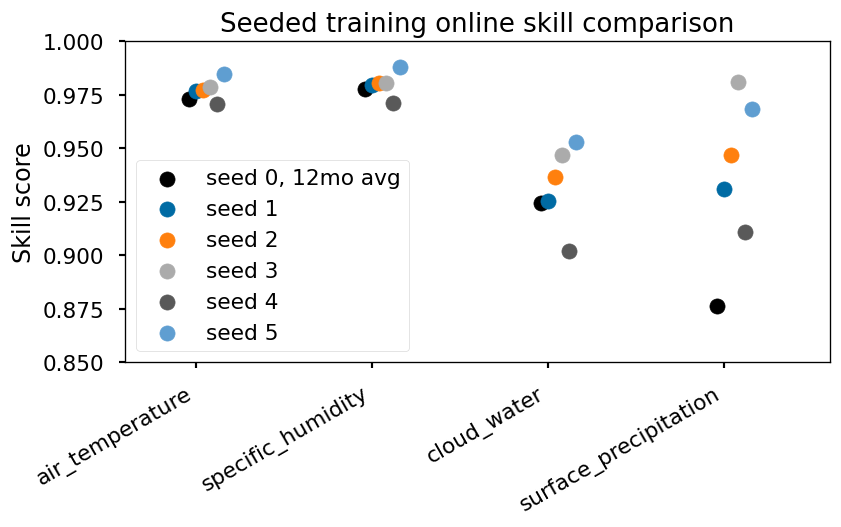

In [157]:
fix, ax = plt.subplots(dpi=120, figsize=(7,4.5))
colors = iter(plt.rcParams["axes.prop_cycle"])
x = np.arange(len(online_init)) * 1.25
plt.scatter(x-0.05, online_init.values, c="k", label="seed 0, 12mo avg")
for i, (skill_name, series) in enumerate(reduced.items()):
    values = series.values
    c = next(colors)
    x_jitter = x + i * 0.05
    plt.scatter(x=x_jitter, y=values, c=c["color"], label=f"seed {i+1}")
labels = [l.replace("column_skill/", "") for l in series.index]
plt.xticks(ticks=x, labels=labels, rotation=30, ha="right")
ax.set_xlim(-0.5, 4.5)
ax.set_ylim(0.85, 1)
plt.title("Seeded training online skill comparison")
plt.ylabel("Skill score")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()